In [4]:
import os
import librosa
import soundfile as sf
import matplotlib.pyplot as plt


In [2]:
for id in ['00285', '00359', '00715', '01087']:
    for file_name in ['noisy_mixture', 'target_speech', 'overall_noise']:

        file_path = os.path.join(r"C:\Users\toviste\Local_Documents\code\ovistetom.github.io\mix-ears-wham\data", id, f"{file_name}.flac")

        waveform, sr = librosa.load(file_path, mono=False)
        waveform = waveform[1::2]

        # Save the waveform
        wav_filename = file_path.replace('.flac', '.wav')
        sf.write(wav_filename, waveform.T, sr, format='wav')

        mp3_filename = file_path.replace('.flac', '.mp3')
        os.replace(wav_filename, mp3_filename)
        os.remove(file_path)


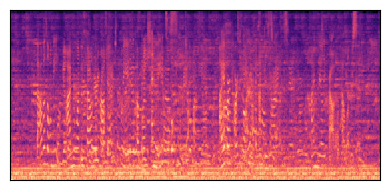

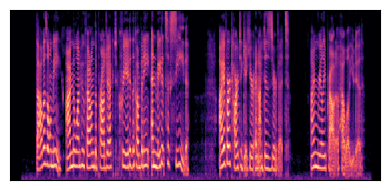

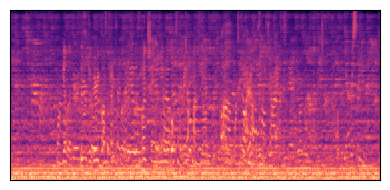

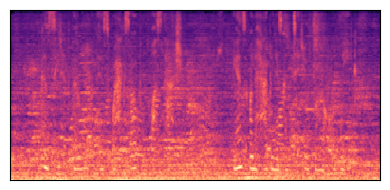

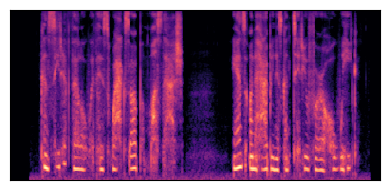

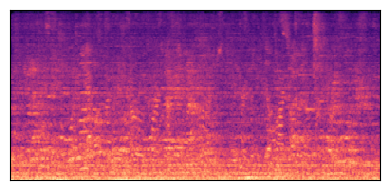

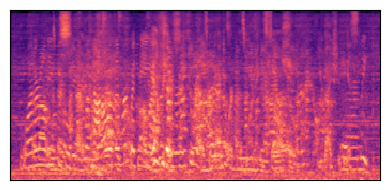

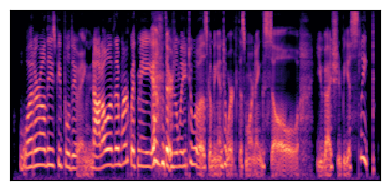

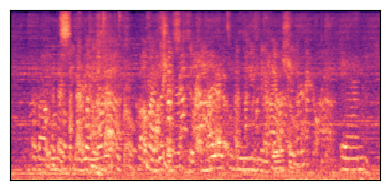

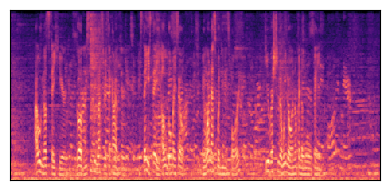

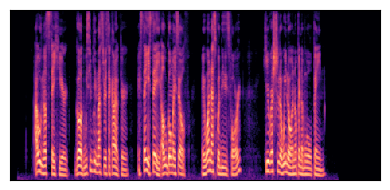

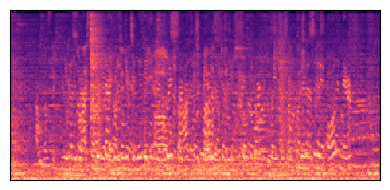

In [7]:
for id in ['00285', '00359', '00715', '01087']:
    for file_name in ['noisy_mixture', 'target_speech', 'overall_noise']:

        file_path = os.path.join(r"C:\Users\toviste\Local_Documents\code\ovistetom.github.io\mix-ears-wham\data", id, f"{file_name}.mp3")

        waveform, sr = librosa.load(file_path)
        mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sr, fmax=8000, n_fft=2048)
        mel_spec = librosa.power_to_db(mel_spec)

        plt.figure(figsize=(4,2))
        librosa.display.specshow(mel_spec, sr=sr, x_axis='off', y_axis='off', fmax=4000, cmap='magma')
        plt.tight_layout()
        plt.savefig(file_path.replace('.mp3', '.png'))
        #plt.show()